In [1]:
import sys
sys.path.append('../')

In [2]:
import ctn_benchmark

%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from hyperopt import fmin, hp, tpe, Trials, rand
import pickle
import hyperopt

In [3]:
import vision_benchmarks
reload (vision_benchmarks)

<module 'vision_benchmarks' from '../vision_benchmarks.pyc'>

In [4]:
def objective(x):
    vals = vision_benchmarks.Vision_Model().run(
        #AIT_V1_strength = x['AIT_V1_strength']
        #V1_r_transform = x['V1_r_transform'] 
        AIT_r_transform = x['AIT_r_transform']
    )
    return {
        'loss': 
            abs(vals['V1_to_AIT'] - 0.04) + abs(vals['AIT_to_PFC'] - 0.03),
        
        'status': hyperopt.STATUS_OK,
    }
trials = Trials()
best = fmin(objective,
            space = {#'AIT_V1_strength': hp.uniform('AIT_V1_strength', 0, 1)
                     #'V1_r_transform': hp.uniform('V1_r_transform', 0, 1)
                     'AIT_r_transform': hp.uniform('AIT_r_transform', 0, 1)
                    },
            algo = rand.suggest,
            max_evals = 50,
            trials = trials
           )
pickle.dump({'Trials': trials, 'Best': best}, open ('AIT_r_transform_data', 'w'))

running Vision_Model#20160727-141608-48cb8d8a
Simulation finished in 0:00:34.                                                 
_runtime = 2
_result_feedback = 0.4195086163487056
_compare_to_result_strength = 0.12966085928477078
_D = 32
_motor_feedback = 0.06848695023305285
_motor_transform = 2.0
_finger_feedback = 0.9603352183200515
_motor_to_fingers_strength = 0.8079719992231219
_AIT_V1_strength = 0.06848695023305285
_V1_r_transform = 0.11090645719111913
_AIT_r_transform = 0.6964691855978616
_backend = 'nengo'
_dt = 0.001
_seed = 1
_hide_overlay = False
_gui = False
AIT_to_PFC = 0.023000000000000003
MC_to_finger = 0.033000000000000002
PFC_to_PMC = 0.020000000000000004
PMC_to_MC = 0.013999999999999999
V1_to_AIT = 0.021999999999999999
finger_to_end = 0.024000000000000007
retina_to_V1 = 0.0050000000000000001
running Vision_Model#20160727-141707-7739df34
Simulation finished in 0:00:31.                                                 
_runtime = 2
_result_feedback = 0.4195086163487056
_com

In [5]:
print(best)

{'AIT_r_transform': 0.6964691855978616}


How does this compare to the value that the multi-parameter hyperopt gave for this variable? It's very close - the initial value for the AIT_r_transform parameter is 0.06848695023305285.

In [21]:
#data = pickle.load(open('AIT_r_transform_data','r'))
import pandas
import seaborn as sns
data = ctn_benchmark.Data('data')
df = pandas.DataFrame(data.data)

Since benchmarks stores all the data in one folder, I filter the data by removing files that contain non-standard values for the parameters supposedly held constant. 

In [22]:
df = df[df._V1_r_transform == 0.11090645719111913]
df = df[df._AIT_V1_strength == 0.06848695023305285]
df

,AIT_to_PFC,MC_to_finger,PFC_to_PMC,PMC_to_MC,V1_to_AIT,_AIT_V1_strength,_AIT_r_transform,_D,_V1_r_transform,__builtins__,...,_gui,_hide_overlay,_motor_feedback,_motor_to_fingers_strength,_motor_transform,_result_feedback,_runtime,_seed,finger_to_end,retina_to_V1
0,0.020,0.029,0.020,0.014,0.025,0.068487,0.898379,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.028,0.005
5,0.019,0.022,0.021,0.014,0.025,0.068487,0.940674,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.034,0.005
6,0.023,0.068,0.010,0.025,0.015,0.068487,0.149402,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.042,0.005
8,0.027,0.038,0.004,0.031,0.017,0.068487,0.490962,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.030,0.005
10,0.023,0.055,0.010,0.025,0.015,0.068487,0.147700,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.054,0.005
14,0.021,0.032,0.021,0.014,0.023,0.068487,0.797402,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.033,0.005
17,0.022,0.034,0.021,0.014,0.022,0.068487,0.650154,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.029,0.005
18,0.024,0.048,0.009,0.026,0.015,0.068487,0.356983,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.034,0.005
20,0.024,0.048,0.009,0.026,0.015,0.068487,0.313620,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.036,0.005
21,0.024,0.068,0.009,0.025,0.015,0.068487,0.153216,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.041,0.005


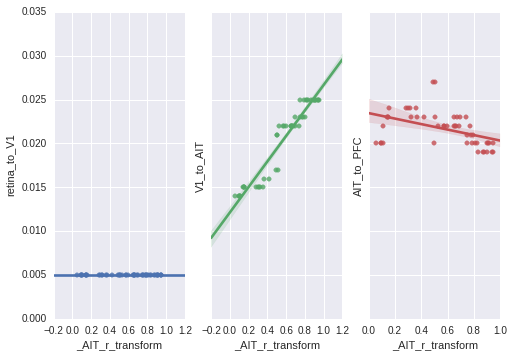

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = '_AIT_r_transform'
sns.regplot(x, y = 'retina_to_V1', ax = ax1, data = df)
sns.regplot(x, y = 'V1_to_AIT', ax = ax2, data = df)
sns.regplot(x, y = 'AIT_to_PFC', ax = ax3, data = df)